In [19]:
# Machine learning and data manipulation libraries 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter

In [20]:
# Important NLTK packages for: 
nltk.download('punkt') # Tokenzation
nltk.download('stopwords') # Removing common english stop words
nltk.download('wordnet') # Lemmatization / Lemming

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\logan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Loading and Preprocessing Data with NLTK

In [21]:
# Amazon reviews scraped from Amazon using amazon_reviews_scrapping.py
data = pd.read_csv('Samsung_Galaxy_S22_5G_Mobile_P.csv')

data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [22]:
data.head()

,Author,Rating,Title,Review,Date
0,ronz,5,Superb phone and exceptional camera.,"Delivery was excellent, it was very well packa...",6 April 2024
1,W. Davies,5,A step up from my S20,"My S20 was/is fine, apart from battery life no...",4 May 2024
2,Manole Danut,4,"Good phone, mediocre battery.",The overall product is good. When opening the ...,25 July 2022
3,Tilly,5,My new phone,I am really happy with my upgrade.\nThe camera...,1 June 2024
4,Sean H,5,"Sleek Design, Powerful Performance: Samsung Ga...",The Samsung Galaxy S22 5G in Phantom White is ...,14 March 2024


#### Preprocessing Text Using NLTK

In [23]:
# Setting up NLTK tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to clean and generalize the text
def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizing a text
    tokens = word_tokenize(text)

    # Removing stop words and applying lemming
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Applying preprocessing to the review text
data['Cleaned_Review'] = data['Review'].apply(preprocess_text)

In [24]:
data['Cleaned_Review'].head()

0    delivery excellent well packaged phone perfect...
1    s20 wasis fine apart battery life great new fa...
2    overall product good opening box get phone 1 m...
3    really happy upgrade camera video feature bril...
4    samsung galaxy s22 5g phantom white stunning s...
Name: Cleaned_Review, dtype: object

#### Performing Exploratory Data Analysis

count    100.000000
mean       3.860000
std        1.557128
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64


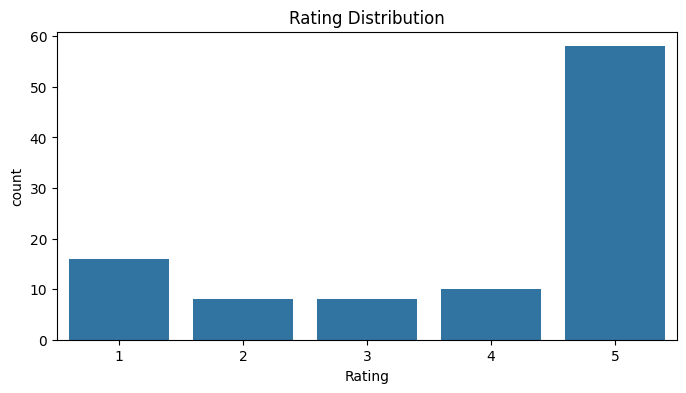

In [25]:
print(data['Rating'].describe())

# Checking the distribution of the ratings
plt.figure(figsize=(8, 4))
sns.countplot(x='Rating', data=data)
plt.title('Rating Distribution')
plt.show()

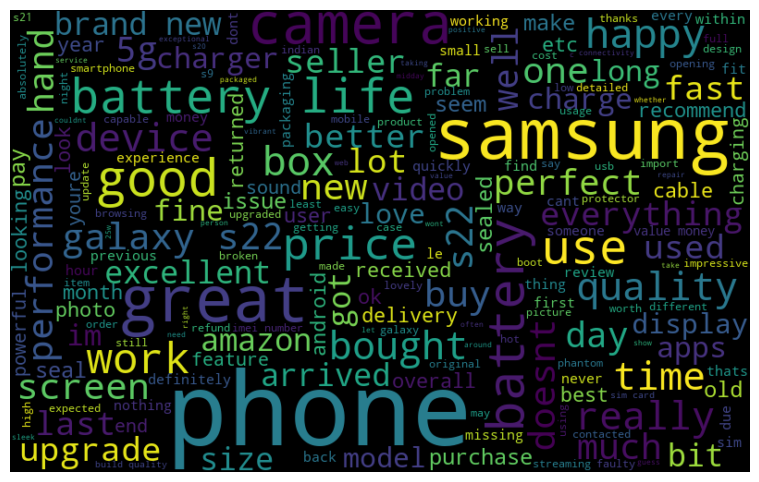

In [26]:
# Plotting a Word CLoud
all_words = ' '.join([text for text in data['Cleaned_Review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Sentiment Labeling

In [27]:
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating <= 2:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['Rating'].apply(label_sentiment)

In [28]:
data['Sentiment'].value_counts()

Sentiment
positive    68
negative    24
neutral      8
Name: count, dtype: int64

#### Applying Term Frequency - Inverse Document Frequency on Corpus

In [29]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Cleaned_Review']).toarray()
y = data['Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model Selection and Training

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  8]
 [ 0  0  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.00      0.00      0.00         2
    positive       0.50      1.00      0.67        10

    accuracy                           0.50        20
   macro avg       0.17      0.33      0.22        20
weighted avg       0.25      0.50      0.33        20



c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\logan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

#### Sentiment Words Analysis

In [31]:
# Function to get a word count of top 20 words for all type of sentiment
def get_word_frequencies(reviews):
    # Removing the following words as they don't add any quantifiable value to the total words
    to_be_removeed_words = ['phone', 'samsung', 's22', 'device']
    all_words = ' '.join(reviews['Cleaned_Review']).split()
    all_words = [value for value in all_words if value not in to_be_removeed_words]
    word_freq = Counter(all_words)
    return word_freq.most_common(20)

positive_reviews = data[data['Sentiment'] == 'positive']
negative_reviews = data[data['Sentiment'] == 'negative']
neutral_reviews = data[data['Sentiment'] == 'neutral']

positive_word_freq = get_word_frequencies(positive_reviews)
negative_word_freq = get_word_frequencies(negative_reviews)
neutral_word_freq = get_word_frequencies(neutral_reviews)

print("\nPositive reviews common words:", positive_word_freq)
print("\nNegative reviews common words:", negative_word_freq)
print("\nNeutral reviews common words:", neutral_word_freq)


Positive reviews common words: [('great', 29), ('battery', 20), ('camera', 16), ('good', 15), ('new', 13), ('happy', 12), ('price', 12), ('perfect', 9), ('life', 9), ('quality', 9), ('like', 8), ('excellent', 7), ('would', 7), ('fast', 7), ('use', 7), ('day', 7), ('much', 7), ('far', 6), ('better', 6), ('lot', 6)]

Negative reviews common words: [('battery', 8), ('use', 8), ('used', 6), ('bought', 6), ('buy', 5), ('work', 5), ('get', 5), ('box', 5), ('amazon', 5), ('sim', 5), ('back', 4), ('one', 4), ('time', 4), ('really', 4), ('screen', 4), ('could', 4), ('pay', 4), ('seal', 4), ('missing', 4), ('100', 4)]

Neutral reviews common words: [('galaxy', 7), ('battery', 7), ('performance', 6), ('life', 5), ('camera', 5), ('35', 4), ('quality', 4), ('display', 4), ('5g', 3), ('impressive', 3), ('build', 3), ('powerful', 3), ('user', 3), ('update', 3), ('upgrade', 3), ('may', 3), ('boot', 3), ('screen', 3), ('android', 3), ('ok', 3)]


#### Visualizing Word Frequencies

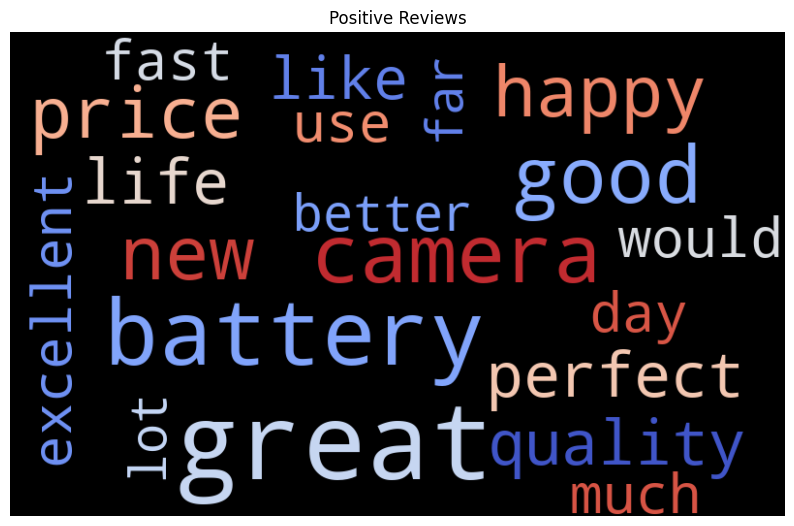

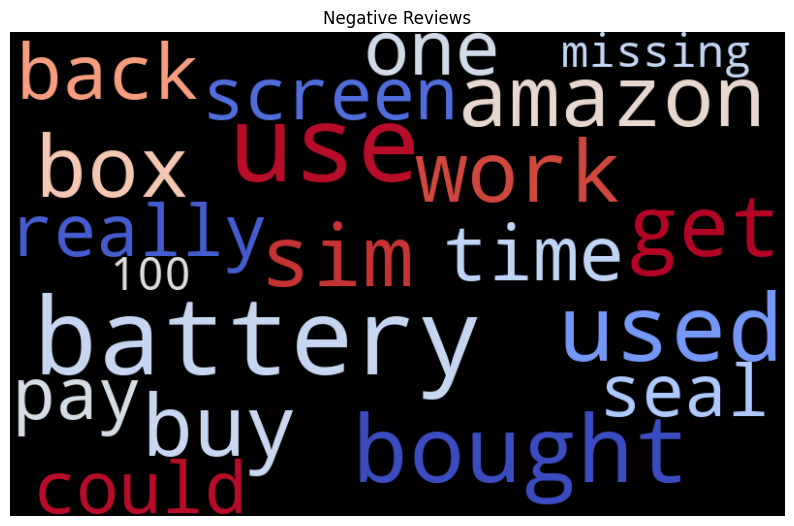

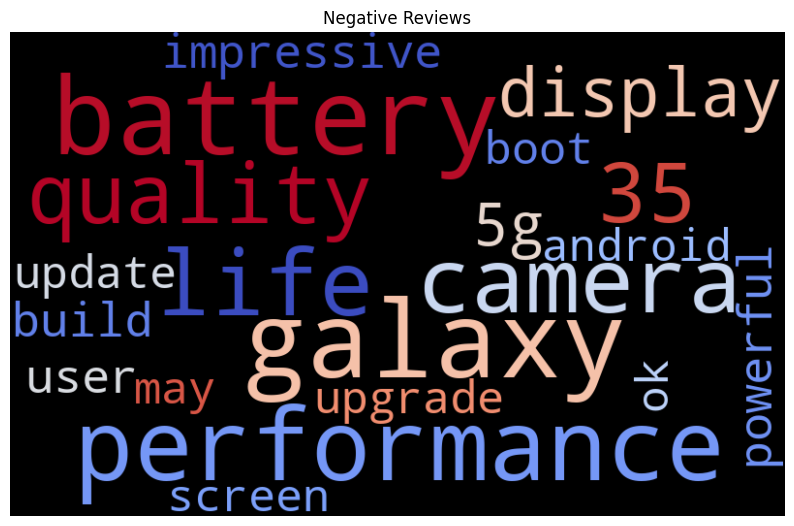

In [32]:
# Visualizing the word count as calculated above in a Word CLoud Plot
def plot_wordcloud(word_freq, title):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, colormap='coolwarm').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_wordcloud(positive_word_freq, 'Positive Reviews')
plot_wordcloud(negative_word_freq, 'Negative Reviews')
plot_wordcloud(neutral_word_freq, 'Negative Reviews')

#### Test Analysis of different Reviews

In [33]:
# Example analysis
# negative_reviews['Review'].str.contains('battery').sum()  # Count mentions of 'battery'
positive_reviews['Review'].str.contains('camera').sum()  # Count mentions of 'camera'

13

#### Sentiment Drivers

In [34]:
# Function to derive the word count of different keywords which drives various type of reviews
def sentiment_driver_analysis(reviews, keywords):
    keyword_counts = {}
    for keyword in keywords:
        keyword_counts[keyword] = reviews['Review'].str.contains(keyword).sum()
    return keyword_counts

# Keywords to check the drive/count of the reviews
positive_keywords = ['camera', 'performance', 'design', 'value', 'fast']
negative_keywords = ['battery', 'charger', 'seal', 'screen', 'issue']

positive_drivers = sentiment_driver_analysis(positive_reviews, positive_keywords)
negative_drivers = sentiment_driver_analysis(negative_reviews, negative_keywords)

print("Positive sentiment drivers:", positive_drivers)
print("Negative sentiment drivers:", negative_drivers)

Positive sentiment drivers: {'camera': 13, 'performance': 2, 'design': 2, 'value': 6, 'fast': 8}
Negative sentiment drivers: {'battery': 5, 'charger': 2, 'seal': 3, 'screen': 4, 'issue': 1}


#### Visualizing Sentiment Drivers

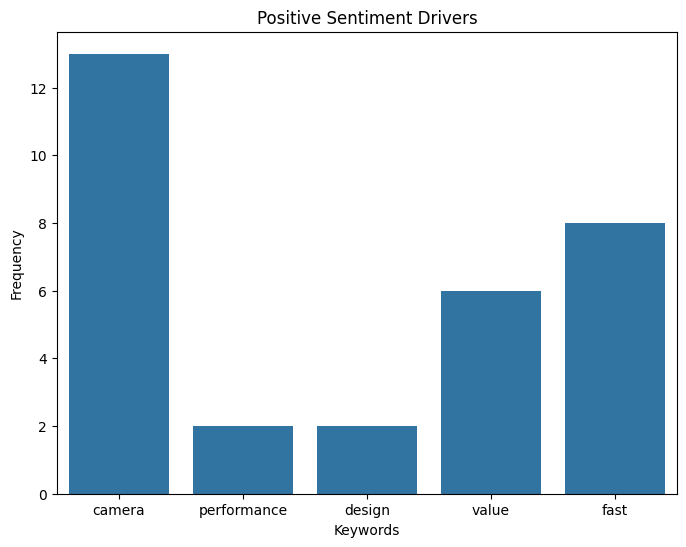

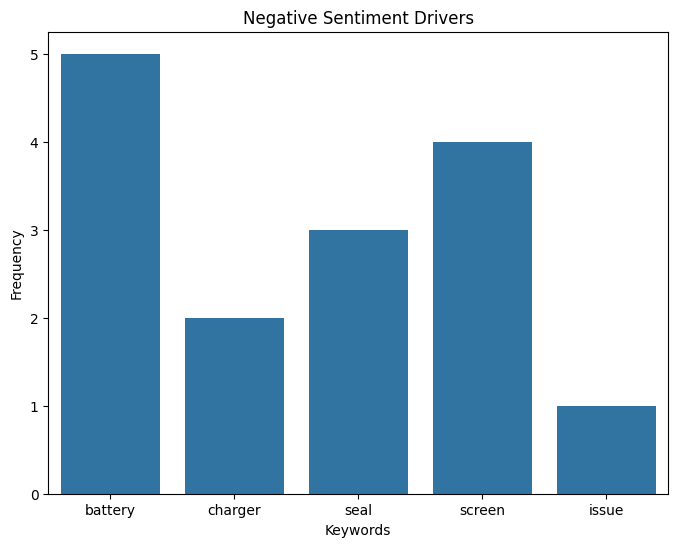

In [35]:
def plot_sentiment_drivers(drivers, title):
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(drivers.keys()), y=list(drivers.values()))
    plt.title(title)
    plt.xlabel('Keywords')
    plt.ylabel('Frequency')
    plt.show()

plot_sentiment_drivers(positive_drivers, 'Positive Sentiment Drivers')
plot_sentiment_drivers(negative_drivers, 'Negative Sentiment Drivers')